<a href="https://colab.research.google.com/github/agzpie/data_visualisations/blob/main/WIZUALIZACJA_PROJEKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jak stworzyć BLOCKBUSTER?
### Autorki:
### Agata Pietralik, Megi Broel Plater

# Wstęp do analizy

In [ ]:
# Importujemy podstawowe biblioteki
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.figure_factory import create_table
import seaborn.objects as so

In [ ]:
# Wczytujemy nasze dane
df=pd.read_csv('imdb.csv')
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


# Czyszczenie danych

In [ ]:
df.loc[df['Name'] == 'Shrek']

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,...,Drama,Romance,Action,Crime,Animation,Adventure,SciFi,Thriller,Horror,Fantasy
1620,Shrek,2001,7.9,640174,"Animation, Adventure, Comedy",90,Film,PG,0,Mild,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
# Zamiana typów danych z Object na Float i Int, wraz z ogólnym czyszczeniem i porządkowaniem danych
df = df[ df['Rate'].str.contains('No Rate')==False ]
df['Rate'] = df['Rate'].astype(float)

df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].astype(int)

df = df[ df['Duration'].str.contains('None')==False ]
df['Duration'] = df['Duration'].astype(int)

df['Episodes'] = df['Episodes'].str.replace('-','0')
df['Episodes'] = df['Episodes'].astype(int)

# Myślnik w Sci-Fi zwracał błąd, więc został usunięty dla ułatwienia obróbki danych
df['Genre']=df['Genre'].str.replace('Sci-Fi','SciFi')

df.dtypes
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,0,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,0,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,0,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, SciFi",97,Film,PG-13,0,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,0,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,0,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,0,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,0,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,0,None,None,Mild,Moderate,None


In [ ]:
# Sprawdzenie minimalnej wartości w kolumnie 'Date', aby stworzyć data frame o odpowiednim rozmiarze
df['Date'].min()

1922

# Ekstrakcja pojedynczych gatunków

In [ ]:
# Tworzenie listy najczęściej występujących gatunków
names = [ 'Comedy', 'Drama', 'Romance', 'Action', 'Crime', 'Animation', 'Adventure', 'SciFi', 'Thriller', 'Horror', 'Fantasy' ]

# Funkcja, która dodaje kolumny z gatunkami do data frame'u i zaznacza, czy dany film należy do gatunku czy nie
def extract_categories(df, names):
  for i in names:
    df[i]=df['Genre'].apply(lambda x: i in x)

extract_categories(df, names)
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,...,Drama,Romance,Action,Crime,Animation,Adventure,SciFi,Thriller,Horror,Fantasy
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,0,Mild,...,False,False,True,False,False,True,False,True,False,False
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,0,None,...,True,False,False,True,False,False,False,True,False,False
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,0,Moderate,...,True,False,False,True,False,False,False,False,False,False
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, SciFi",97,Film,PG-13,0,None,...,False,False,True,False,False,True,True,False,False,False
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,0,None,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,0,Severe,...,False,False,False,False,False,False,False,False,True,False
6174,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,0,None,...,True,False,False,True,False,False,False,False,False,False
6175,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,0,Severe,...,True,False,False,True,False,False,False,True,False,False
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,0,None,...,True,True,False,False,False,False,False,False,False,False


## Zamiana data frame z wide data type na long data type z interesującymi nas atrybutami

In [ ]:
# WIDE TO LONG
df_long = pd.melt(df, id_vars=['Name', 'Date', 'Rate', 'Type', 'Votes'], var_name='Genre', value_vars=names)

# REMOVING FALSE VALUES/ROWS
df_long = df_long[df_long.value]
df_long

,Name,Date,Rate,Type,Votes,Genre,value
5,Ted Lasso,2021,8.8,Series,117562,Comedy,True
6,Free Guy,2021,7.3,Film,153835,Comedy,True
7,Sex Education,2021,8.3,Series,220201,Comedy,True
12,Seinfeld,2021,8.8,Series,272028,Comedy,True
35,The Addams Family 2,2021,5.3,Film,3798,Comedy,True
...,...,...,...,...,...,...,...
64282,Tenki no ko,2019,7.5,Film,31527,Fantasy,True
64289,The Bureau of Magical Things,1995,6.8,Series,1608,Fantasy,True
64293,The Family Man,2000,6.8,Film,106632,Fantasy,True
64298,How High,2001,6.3,Film,56036,Fantasy,True


# Najpopularniejsze gatunki pod względem liczby produkcji

<ipython-input-114-a531064c72ee>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




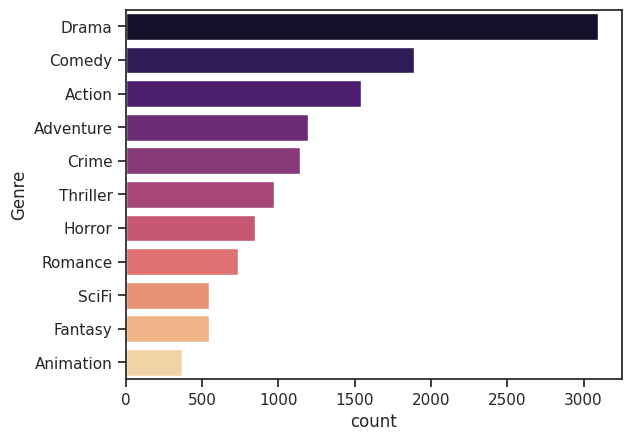

In [ ]:
# Najpopularniejsze gatunki filmowo-serialowe - countplot
sns.countplot(df_long, y = 'Genre', order = df_long['Genre'].value_counts().index, palette='magma')
plt.show()

# Rozkład popularności gatunków na przestrzeni lat

## Przygotowanie danych

In [ ]:
# tworzenie tabelki wypełnionej zerami (bo czasem nie było żadnych filmów w danym roku), żeby później ją nadpisać zliczonymi filmami
df_genres = pd.DataFrame(0, columns=names, index=pd.RangeIndex(start=1922, stop=2022, step=1))
df_genres

,Comedy,Drama,Romance,Action,Crime,Animation,Adventure,SciFi,Thriller,Horror,Fantasy
1922,0,0,0,0,0,0,0,0,0,0,0
1923,0,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017,0,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,0
2020,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Nadpisywanie tabelki zliczonymi filmami: najpierw wybieranie tych filmów, które mają True przy danych gatunkach, potem zliczanie, a na końcu nadpisywanie
def combine_genres(df, df_genres, names):
  for name in names:
    genre_counted = df.query(str(name) + '== True')
    genre_counted = genre_counted.groupby(['Date'])['Name'].count()
    genre_counted = genre_counted.to_frame(name=name)
    df_genres.update(genre_counted, overwrite=True)
  df_genres = df_genres.astype(int)
  return df_genres

combine_genres(df, df_genres, names)

,Comedy,Drama,Romance,Action,Crime,Animation,Adventure,SciFi,Thriller,Horror,Fantasy
1922,0,0,0,0,0,0,0,0,0,1,1
1923,0,0,0,0,0,0,0,0,0,0,0
1924,0,0,0,0,0,0,0,0,0,0,0
1925,0,0,0,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017,56,125,24,60,45,14,47,20,34,31,22
2018,58,150,25,71,51,12,51,34,41,41,22
2019,103,200,30,81,78,18,61,29,54,59,32
2020,106,187,31,61,61,17,36,26,59,69,26


## Wykres ilości produkcji w czasie z podziałem na gatunek

Text(0.5, 1.0, 'Ilość produkcji w czasie, podzielona na gatunki')

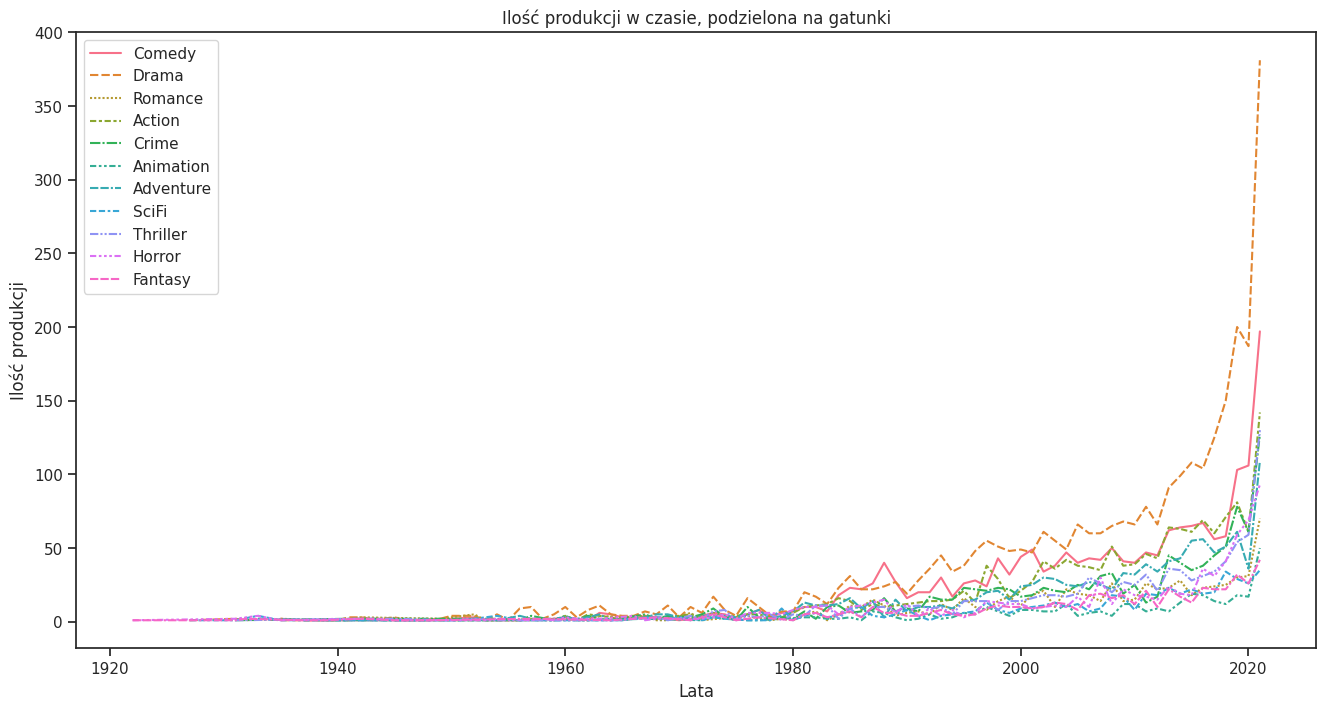

In [ ]:
# Rozkład ilości produkcji danego gatunku w czasie (użyty w prezentacji, ale poniżej są bardziej czytelne i interaktywne wersje)
df_genres.replace(0, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=df_genres)
ax.set(xlabel='Lata', ylabel='Ilość produkcji')
ax.set_title('Ilość produkcji w czasie, podzielona na gatunki')

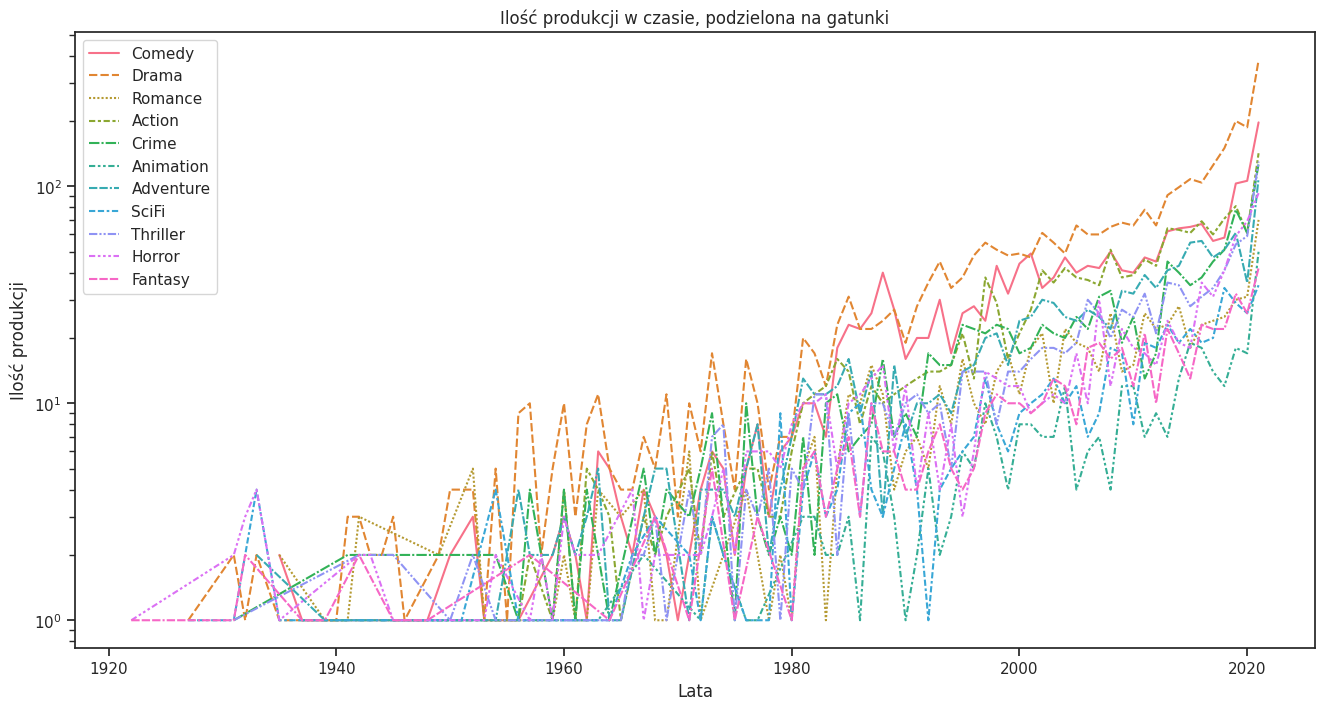

In [ ]:
# Skala logarytmiczna dla lepszej czytelności
df_genres.replace(0, np.nan, inplace=True)
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=df_genres)
ax.set(xlabel='Lata', ylabel='Ilość produkcji')
ax.set_title('Ilość produkcji w czasie, podzielona na gatunki')
plt.yscale('log')

In [ ]:
# Bardziej czytelna wersja wykresu (nie możliwa do użycia w prezentacji ze względu na interaktywność)

# zastapienie 0 pustymi wartosciami
df_genres.replace(0, np.nan, inplace=True)

# stworzenie nowego df zawierajacego wylacznie pozycje od 2000 do 2022 roku
df_genres_new = df_genres.loc[2000:2022]

# animacja przedstawiajaca zmieniajaca sie ilosc produkcji z kazdego gatunku w XXI wieku
# w ponizszym kodzie, bardzo skomplikowana zmienna zwana: df_genres_new.index, oznacza tak naprawde po prostu lata, bo w tym wypadku byly one indexem,
# a names oznacza liste zawierajaca wszystkie nasze gatunki
fig = px.scatter(df_genres_new, x=df_genres_new.index, y=names,
                 animation_frame=df_genres_new.index, animation_group=df_genres_new.index,
                 range_x=[2000, 2022], range_y=[0, 400])

# zmiana nazw osi
fig.update_layout(xaxis_title='Lata', yaxis_title='Ilość produkcji')

fig.show()

# Średnie oceny w czasie

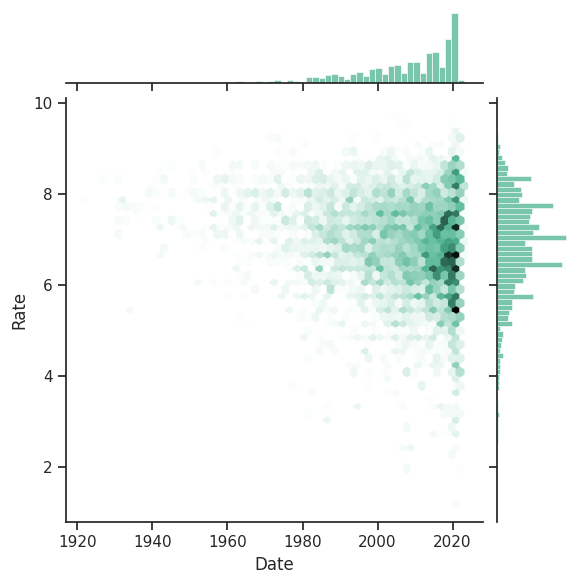

In [ ]:
# Rozkład średniej oceny i ilości filmów - na górze count filmów, po prawej rozłożenie Rate, a w środku gęstość danej oceny - hexplot
sns.set_theme(style="ticks")
sns.jointplot(df_long, x='Date', y='Rate', kind="hex", color="#4CB391")

# Który z gatunków był bardziej popularny na przestrzeni lat? (x:time, y:imdb score, hue: genre)?

## Przygotowanie danych

In [ ]:
# Tworzenie tabelki z zerami dla comedy i drama, które później się nadpisze średnią oceną (Rate)
df_ratings = pd.DataFrame(0, columns=['Drama', 'Comedy'], index=pd.RangeIndex(start=1927, stop=2022, step=1))

In [ ]:
# Rozkład średniej oceny komedii w czasie
comedy = df.query("Comedy == True")
comedy
comedy_test = comedy.groupby(['Date'])['Rate'].mean()
comedy_test = comedy_test.to_frame(name='Comedy')
#comedy_test

In [ ]:
# Rozkład średniej oceny dramatów w czasie
drama = df.query("Drama == True")
drama
drama_test = drama.groupby(['Date'])['Rate'].mean()
drama_test = drama_test.to_frame(name='Drama')
#drama_test

In [ ]:
# Nadpisywanie tabelki średnimi ocenami gatunków na przestrzeni lat
df_ratings.update(drama_test, overwrite=True)
df_ratings.update(comedy_test, overwrite=True)
df_ratings

,Drama,Comedy
1927,8.300000,0.000000
1928,0.000000,0.000000
1929,0.000000,0.000000
1930,0.000000,0.000000
1931,7.650000,0.000000
...,...,...
2017,6.969600,6.973214
2018,6.968000,7.013793
2019,6.993500,6.805825
2020,6.803743,6.622642


## Wykres dramat vs komedia

<Axes: title={'center': 'Popularność Dramatu kontra Komedii'}, xlabel='Lata', ylabel='Ocena'>

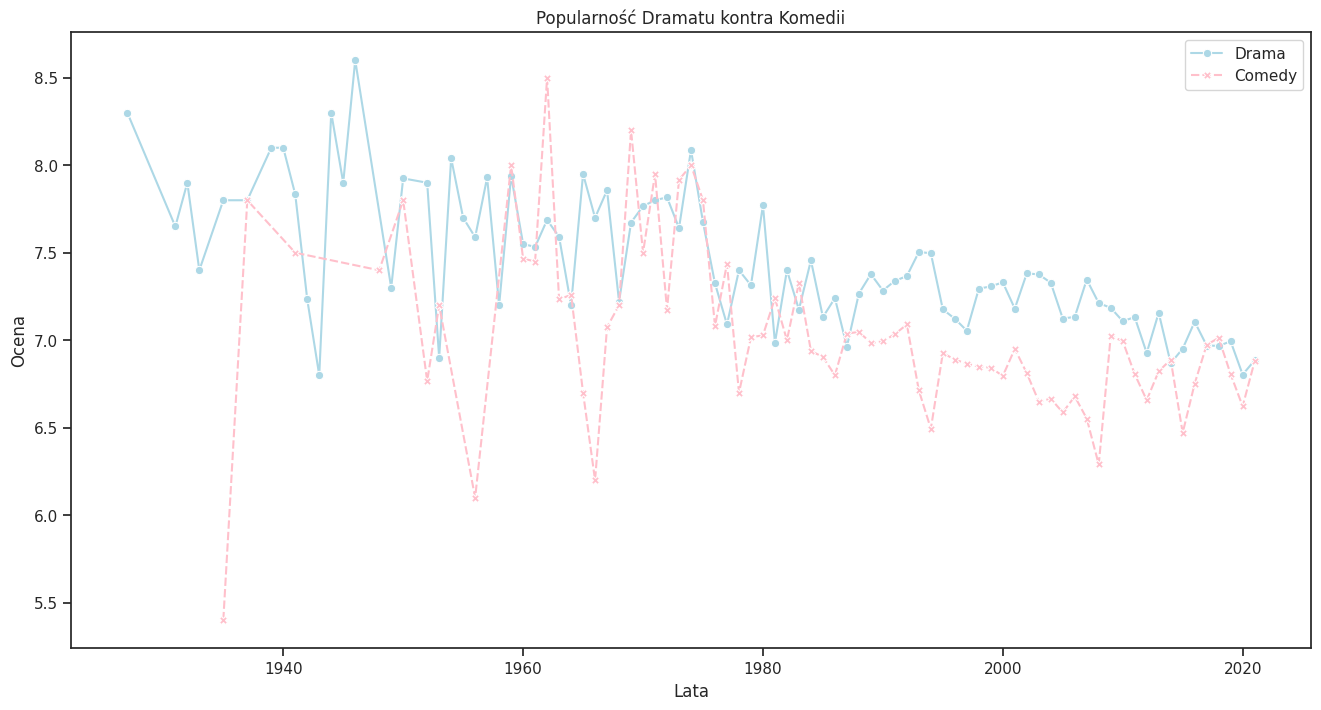

In [ ]:
# Rozkład ocen komedii i dramatów na przestrzeni lat
df_ratings.replace(0, np.nan, inplace=True) # pomijanie wartości 0 w wykresie poprzez zamianę ich na NaN
fig, ax = plt.subplots(figsize=(16, 8))
ax.set(ylabel='Ocena', xlabel='Lata')
ax.set_title('Popularność Dramatu kontra Komedii')
sns.lineplot(data=df_ratings, markers=True, palette=['lightblue', 'pink'])

## Średni score dla gatunku podzielony na movie/series (gatunki, rate, hue:movie/serial)

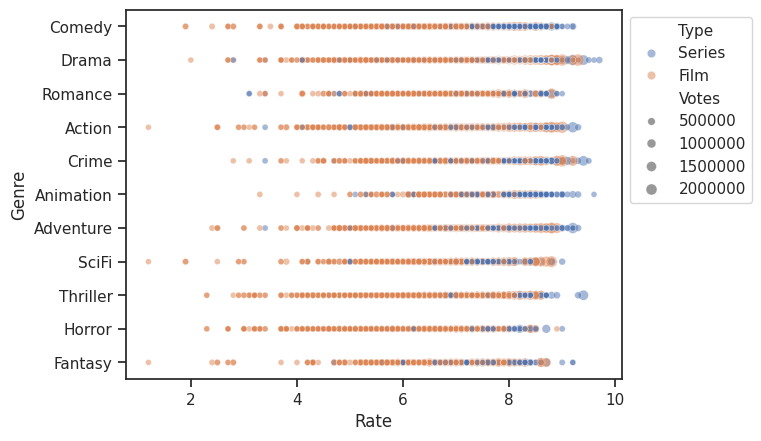

In [ ]:
ax = sns.scatterplot(data=df_long, x='Rate', hue='Type', y='Genre', alpha=0.5, size='Votes')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='Rate', ylabel='Genre'>

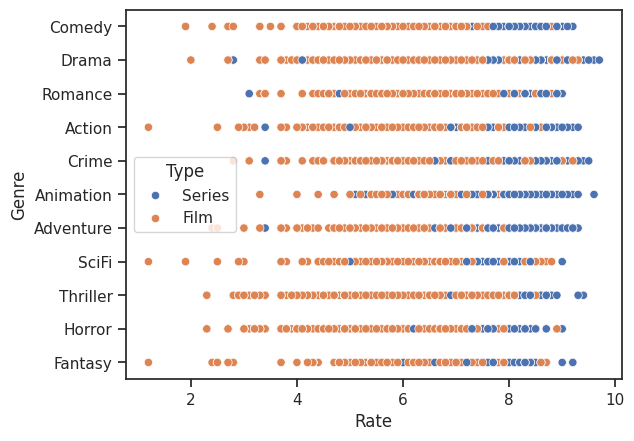

In [ ]:
# Na potrzeby prezentacji użyto uproszczonej wersji powyższego wykresu
sns.scatterplot(data=df_long, x='Rate', hue='Type', y='Genre')

## Średnia ocena mieszanek gatunkowych

<Axes: xlabel='Rate', ylabel='Genre'>

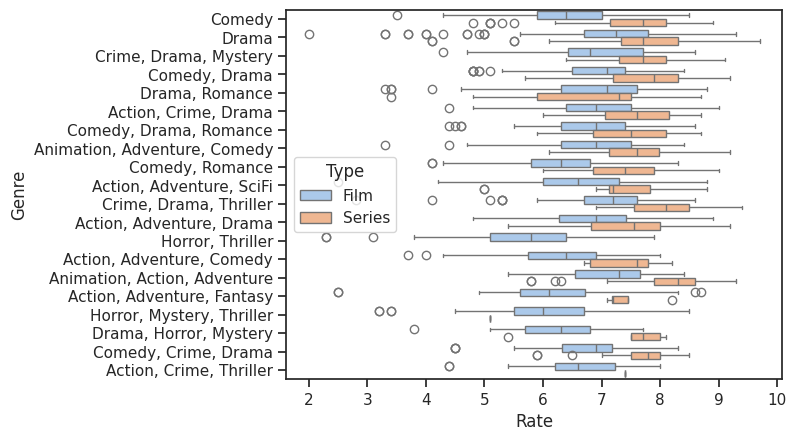

In [ ]:
# Rozkład oceny względem mieszanki gatunków z podziałem na typ (film/serial) - boxplot
sns.boxplot(x=df['Rate'], y=df['Genre'], hue=df['Type'], palette='pastel', order = df['Genre'].value_counts()[:20].index)

<ipython-input-129-0c3abb559fb8>:3: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



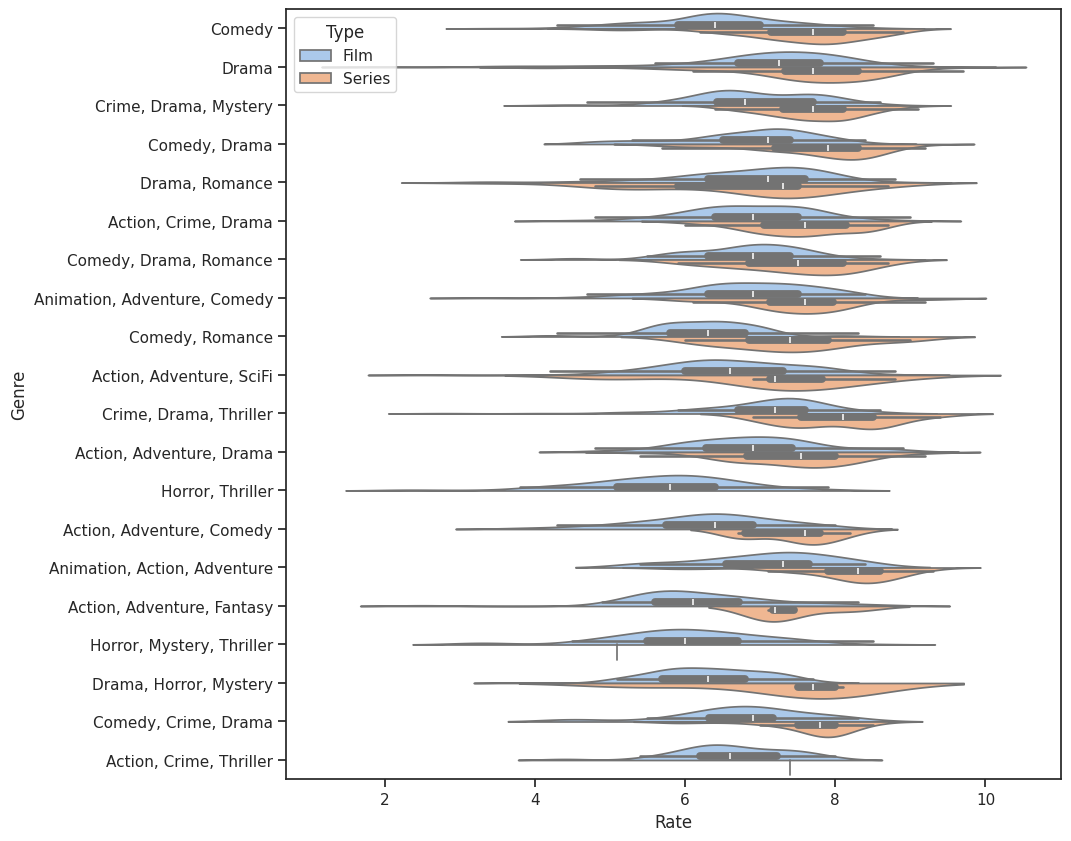

In [ ]:
# Rozkład oceny względem mieszanki gatunków z podziałem na typ (film/serial) - violinplot
plt.figure(figsize=(10, 10))
sns.violinplot(
    x="Rate",
    y="Genre",
    data=df,
    hue="Type",
    order = df['Genre'].value_counts()[:20].index,
    palette="pastel",
    split=True,
    scale="width"
)
plt.show()

# Najpopularniejsze seriale

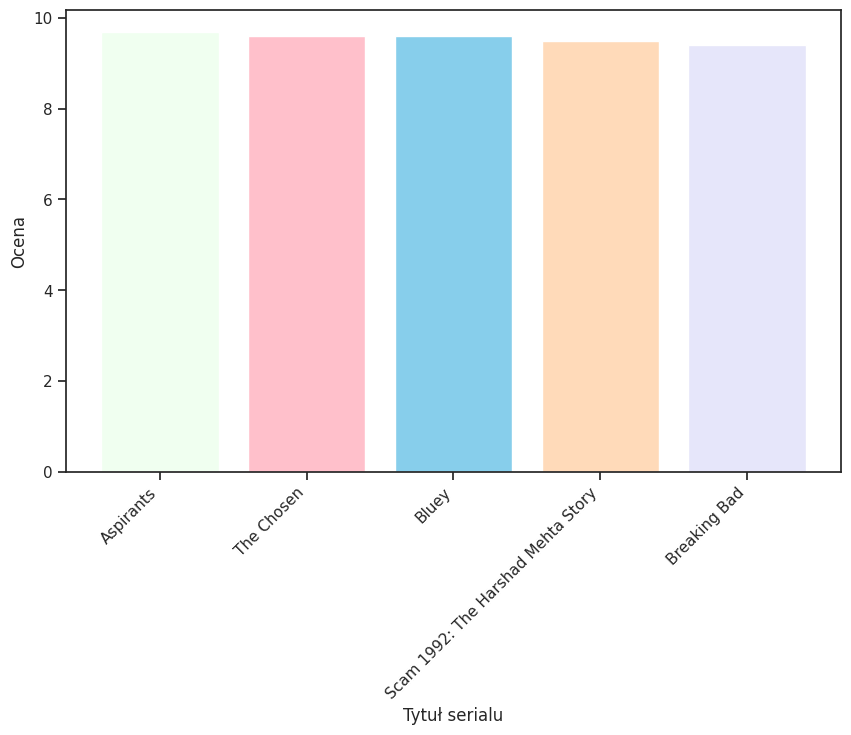

In [ ]:
# Wykres mało atrakcyjny, ale potrzebny do prezentacji
df_series = df[df['Type'] == 'Series']
top_series = df_series.nlargest(5, 'Rate')

plt.figure(figsize=(10, 6))
plt.bar(top_series['Name'], top_series['Rate'], color=['honeydew', 'pink', 'skyblue', 'peachpuff', 'lavender'])

plt.xlabel('Tytuł serialu')
plt.ylabel('Ocena')

plt.xticks(rotation=45, ha='right')

plt.show()


# Średnia popularność filmów i seriali - liczone od 2010 roku

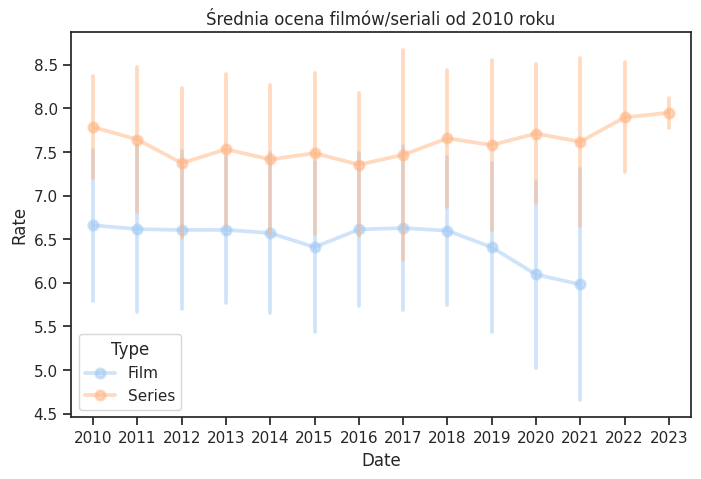

In [ ]:
# Rate od czasu / typ
df_2010 = df.query("Date >= 2010")
df_2010

#sns.scatterplot(data=df_2010, y='Rate', x='Date', hue='Type')

# ten wykres zakomentowany wyżej działa, ale ten niżej jest bardziej kreatywny
plt.figure(figsize=(8, 5))
sns.pointplot(data=df_2010, x="Date", y="Rate", hue='Type', errorbar="sd", palette="pastel", alpha=0.5)
plt.title("Średnia ocena filmów/seriali od 2010 roku")
plt.show()

# Najbardziej optymalna liczba odcinków

<Axes: xlabel='Episodes', ylabel='Rate'>

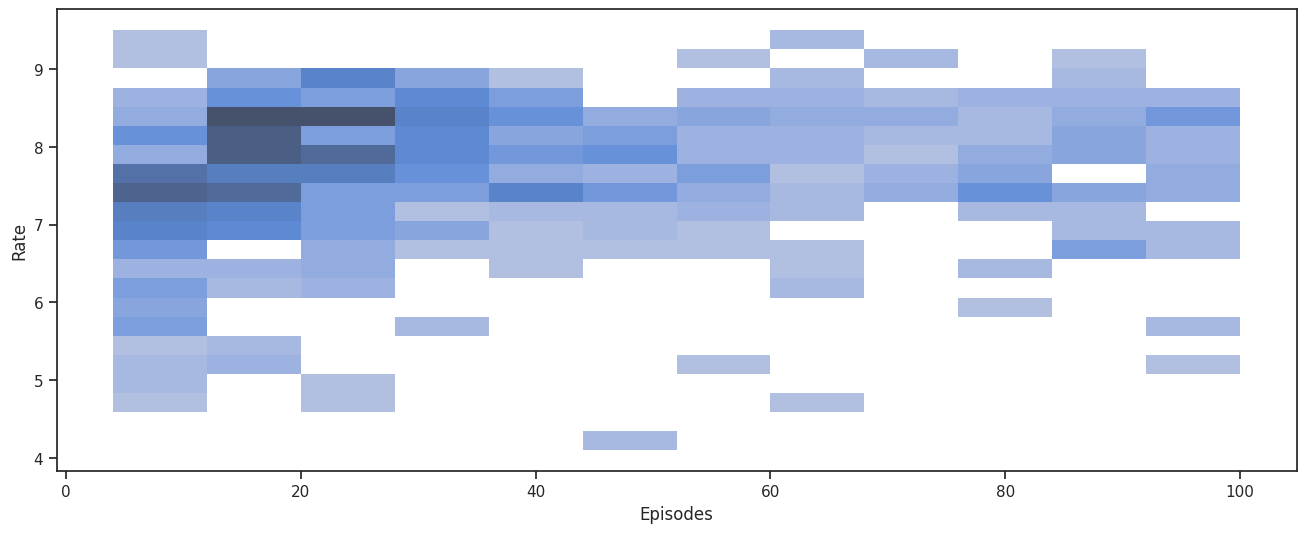

In [ ]:
# Heatmapa ilości odcinków w stosunku do oceny serialu

df['Episodes'].max()

df_episodes = df_2010.query("Episodes <= 100")
df_episodes = df_episodes.query("Episodes > 1")

fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(data=df_episodes, x='Episodes', y='Rate')

# Spiciness

### Kategoryzacja

In [ ]:
# Wybór produkcji od 2010 roku
df_2010 = df.query("Date >= 2010")
df_2010

# Normalizacja (pominięcie seriali z ogromną liczbą odcinków i produkcji jednoodcinkowych)
df_spiciness = df_2010.query("Episodes <= 100")
df_spiciness = df_spiciness.query("Episodes > 1")

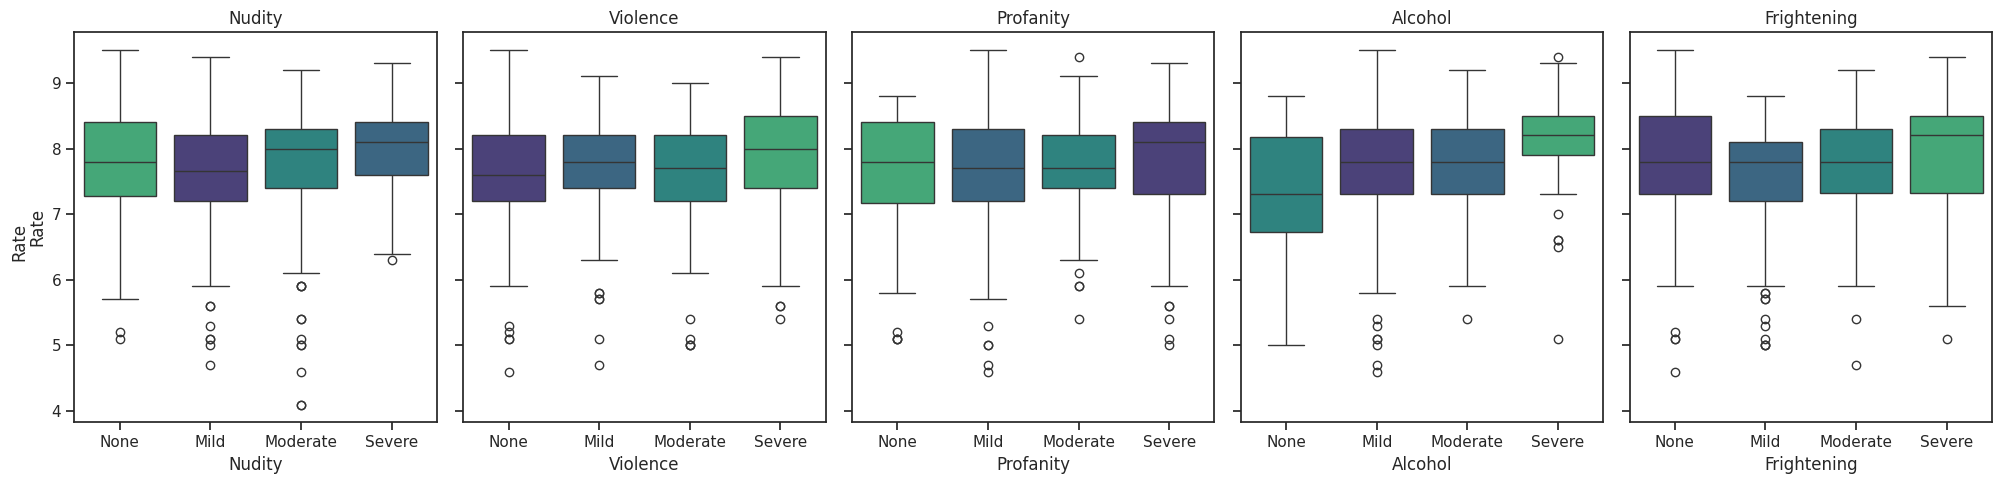

In [ ]:
# Określenie odpowiedniej kolejności kategorii bez uwzględniania 'no rate' - boxplots
spiciness_order = ['None', 'Mild', 'Moderate', 'Severe']

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

variables = ['Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']
for i, var in enumerate(variables):
    sns.boxplot(data=df_spiciness, x=var, y='Rate', order=spiciness_order, hue=var, palette='viridis', ax=axes[i], legend=False) # hue jest dodane żeby pozbyć się warningów
    axes[i].set_title(var)

fig.text(0, 0.5, 'Rate', va='center', rotation='vertical')

plt.tight_layout()